### Atlas Scientific pH  
pH Sensor for measuring acidity (hydrogen ion concentration) of liquids  

Manufacturer Link: https://www.atlas-scientific.com/ph.html  

In [1]:
import matplotlib.pyplot as plt

from meerkat.base import time
from meerkat import atlas, parser

In [2]:
# instance device and set output format to .csv (which is default)
dev = atlas.pH(bus_n=1, output='csv')

#### Configuration

In [3]:
# device information: device type, firmware version
time.sleep(0.5)
dev.info()

('pH', '1.7')

In [4]:
# status of device power: restart code, input voltage Vcc
time.sleep(0.5)
dev.status()

('P', 5.02)

In [5]:
# set current temperature for compensation
time.sleep(0.5)
dev.temp_set(24.4)
time.sleep(0.5)
dev.temp_get()

24.39

#### Calibration

In [6]:
# Three point calibration
dev.cal_set_mid(7.00)
time.sleep(1)
dev.cal_set_low(3.00)
time.sleep(1)
dev.cal_set_high(10.09)
time.sleep(1)
dev.cal_get()

3

In [7]:
# clear calibration
time.sleep(1)
dev.cal_clear()
time.sleep(1)
dev.cal_get()

0

In [8]:
# response breakdown of calibration
time.sleep(0.5)
dev.cal_slope()

(99.9, 99.9)

#### Measurement

In [9]:
# single pH measurement
time.sleep(0.5)
dev.measure()

14.0

In [10]:
# get one sample without a description
dev.get('test_1')

['test_1', 0, 14.0]

In [11]:
# get 5 samples with a description
dev.get('test_2', n=5)

[['test_2', 0, 14.0],
 ['test_2', 1, 14.0],
 ['test_2', 2, 14.0],
 ['test_2', 3, 14.0],
 ['test_2', 4, 14.0]]

#### JSON Data Publishing    

In [12]:
# set the metadata publishing interval to every third sample
dev.json_writer.metadata_interval = 3

In [13]:
dev.publish(description='test_3', n=5)

['{"description": "test_3", "sample_n": 0, "pH": 14.0, "std_time_ms": "2020-02-13 15:11:10.811818"}',
 '{"description": "test_3", "sample_n": 1, "pH": 14.0, "std_time_ms": "2020-02-13 15:11:13.267137"}',
 '{"description": null, "sample_n": 2, "pH": 14.0, "std_time_ms": "2020-02-13 15:11:15.722384", "name": "Atlas_Base", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": null, "device": {"name": "Atlas_pH", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "Varies", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfcf5f0>", "state": null, "active": null, "error": null, "dtype": null, "description": "", "urls": "www.atlas-scientific.com/ph.html", "manufacturer": "Atlas Scientific", "calibration_date": null}, "units": null, "dtypes": nu

#### CSV Writer Output

In [14]:
# write 5 samples to .csv file with description
dev.write(description='test_4', n=5)

In [15]:
# name of file written
dev.csv_writer.path

'2020_02_13_15_11_23_data.csv'

In [16]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

In [17]:
df

,std_time_ms,description,sample_n,pH,datetime64_ns
0,2020-02-13 15:11:23.123505,test_4,0,14.0,2020-02-13 15:11:23.123505
1,2020-02-13 15:11:25.579066,test_4,1,14.0,2020-02-13 15:11:25.579066
2,2020-02-13 15:11:28.034612,test_4,2,14.0,2020-02-13 15:11:28.034612
3,2020-02-13 15:11:30.490258,test_4,3,14.0,2020-02-13 15:11:30.490258
4,2020-02-13 15:11:32.945788,test_4,4,14.0,2020-02-13 15:11:32.945788


In [18]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack

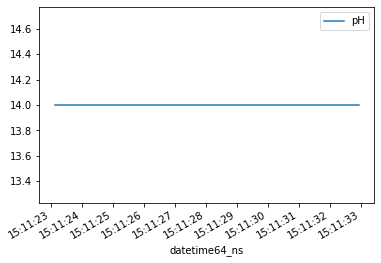

In [19]:
df[["datetime64_ns", "pH"]].plot(x="datetime64_ns");

#### JSON Writer Output

In [20]:
dev.writer_output = "json"

In [21]:
# get 7 samples with a description
dev.write(description='test_5', n=7)

In [22]:
# name of file written
dev.json_writer.path

'2020_02_13_15_11_38.jsontxt'

In [23]:
!head $dev.json_writer.path

{"description": "test_5", "sample_n": 0, "pH": 14.0, "std_time_ms": "2020-02-13 15:11:38.642026"}
{"description": "test_5", "sample_n": 1, "pH": 14.0, "std_time_ms": "2020-02-13 15:11:41.097780"}
{"description": null, "sample_n": 2, "pH": 14.0, "std_time_ms": "2020-02-13 15:11:43.553404", "name": "Atlas_Base", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": "2020_02_13_15_11_38.jsontxt", "device": {"name": "Atlas_pH", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "Varies", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfcf5f0>", "state": null, "active": null, "error": null, "dtype": null, "description": "", "urls": "www.atlas-scientific.com/ph.html", "manufacturer": "Atlas Scientific", "calibration_date": null}, "units": null, "